In [14]:
import folium
from folium.plugins import BeautifyIcon
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 15.4MB 232kB/s 
     |████████████████████████████████| 6.6MB 31.2MB/s 


In [1]:
import geopandas as gp

In [2]:
geo_df = gp.read_file('Vietnam_AL2-AL2.shp',encoding='utf8')
geo_df.head()

id country     name   enname   locname  \
0  49915     VNM  Vietnam  Vietnam  Vi?t Nam   

                            offname        boundary  adminlevel wikidata  \
0  C?ng Ha X H?i Ch? Ngh?a Vi?t Nam  administrative           2     Q881   

     wikimedia            timestamp  note     path    rpath iso3166_2  \
0  vi:Vi?t Nam  2020-01-03 22:58:02  None  0,49915  49915,0      None   

                                            geometry  
0  MULTIPOLYGON (((112.92070 7.89210, 112.92067 7...

In [3]:
geo_df.loc[0,'geometry']

In [4]:
gdf = gp.read_file('district-boundary-hcm-city.geojson')
gdf.head()

id                 name               localname  \
0  3850184         Saigon South  Khu đô thị Nam Sài Gòn   
1  3797166  Binh Thanh District         Quận Bình Thạnh   
2  2587287           District 1                  Quận 1   
3  3819816           District 3                  Quận 3   
4  2778323           District 4                  Quận 4   

                   timestamp  SRID  admin_level  \
0  2016-03-18T23:05:02+01:00  4326            5   
1  2016-03-18T23:05:02+01:00  4326            6   
2  2016-03-18T23:05:02+01:00  4326            6   
3  2016-03-18T23:05:02+01:00  4326            6   
4  2016-03-18T23:05:02+01:00  4326            6   

                                                tags  \
0  {'name': 'Khu đô thị Nam Sài Gòn', 'name:en': ...   
1  {'name': 'Quận Bình Thạnh', 'name:en': 'Binh T...   
2  {'name': 'Quận 1', 'name:en': 'District 1', 'n...   
3  {'name': 'Quận 3', 'name:en': 'District 3', 'n...   
4  {'name': 'Quận 4', 'name:en': 'District 4', 'b...   

                                            geometry  
0  MULTIPOLYGON (((106.69344 10.72213, 106.69475 ...  
1  MULTIPOLYGON (((106.68386 10.80711, 106.68388 ...  
2  MULTIPOLYGON (((106.68165 10.76543, 106.68187 ...  
3  MULTIPOLYGON (((106.66422 10.78714, 106.66457 ...  
4  MULTIPOLYGON (((106.68639 10.75184, 106.68641 ...

<AxesSubplot:>

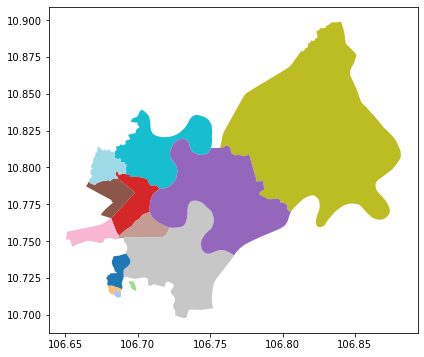

In [5]:
gdf.plot(column='localname',cmap='tab20',figsize=(8,6))

In [6]:
print(gdf.crs)

epsg:4326


In [7]:
gdf.geometry = gdf.geometry.to_crs(epsg = 3587)

In [8]:
gdf.head()

id                 name               localname  \
0  3850184         Saigon South  Khu đô thị Nam Sài Gòn   
1  3797166  Binh Thanh District         Quận Bình Thạnh   
2  2587287           District 1                  Quận 1   
3  3819816           District 3                  Quận 3   
4  2778323           District 4                  Quận 4   

                   timestamp  SRID  admin_level  \
0  2016-03-18T23:05:02+01:00  4326            5   
1  2016-03-18T23:05:02+01:00  4326            6   
2  2016-03-18T23:05:02+01:00  4326            6   
3  2016-03-18T23:05:02+01:00  4326            6   
4  2016-03-18T23:05:02+01:00  4326            6   

                                                tags  \
0  {'name': 'Khu đô thị Nam Sài Gòn', 'name:en': ...   
1  {'name': 'Quận Bình Thạnh', 'name:en': 'Binh T...   
2  {'name': 'Quận 1', 'name:en': 'District 1', 'n...   
3  {'name': 'Quận 3', 'name:en': 'District 3', 'n...   
4  {'name': 'Quận 4', 'name:en': 'District 4', 'b...   

                                            geometry  
0  MULTIPOLYGON (((-3073344.707 11681797.437, -30...  
1  MULTIPOLYGON (((-3063133.181 11677467.040, -30...  
2  MULTIPOLYGON (((-3067706.690 11680363.327, -30...  
3  MULTIPOLYGON (((-3064156.207 11680930.475, -30...  
4  MULTIPOLYGON (((-3069541.308 11680697.426, -30...

In [9]:
gdf.crs

<Projected CRS: EPSG:3587>
Name: NAD83(NSRS2007) / Michigan Central
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Michigan - counties of Alcona; Alpena; Antrim; Arenac; Benzie; Charlevoix; Cheboygan; Clare; Crawford; Emmet; Gladwin; Grand Traverse; Iosco; Kalkaska; Lake; Leelanau; Manistee; Mason; Missaukee; Montmorency; Ogemaw; Osceola; Oscoda; Otsego; Presque Isle; Roscommon; Wexford.
- bounds: (-87.06, 43.8, -82.27, 45.92)
Coordinate Operation:
- name: SPCS83 Michigan Central zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
latitude = 10.7758439
longitude = 106.7017555

In [17]:
df = pd.read_excel('HCMC_location.xlsx', sheet_name='Location')
df.head()

STT   ID          Name          Bourough  Postal cost   Latitude  \
0    1  760        Quận 1   Vietnam, Quan 1          NaN  10.775659   
1    2  761       Quận 12  Vietnam, Quan 12          NaN  10.867153   
2    3  762  Quận Thủ Đức  Vietnam, Thu Duc          NaN  10.849409   
3    4  763        Quận 9   Vietnam, Quan 9          NaN  10.842840   
4    5  764   Quận Gò Vấp   Vietnam, Go Vap          NaN  10.838678   

    Longitude  Population  Population_all  Avg_land_price  
0  106.700424     193.632          193632        59852096  
1  106.641332     510.326          510326         3505942  
2  106.753705     528.413          528413         5249286  
3  106.828685     290.620          290620         3337584  
4  106.665290     634.146          634146         9873267

In [18]:
# create map of Toronto using latitude and longitude values
map_hcm = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='red',
        tooltip=label,
        fill_opacity=0.7).add_to(map_hcm)  
    
map_hcm

In [19]:
# create map of Toronto using latitude and longitude values
map_hcm = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    icon_star = folium.Icon(
        prefix='fa', 
        icon='fa-apple', 
        icon_color='red',
    )
    folium.Marker([lat, lng],icon=icon_star, tooltip=label).add_to(map_hcm)
    
map_hcm

In [20]:
# Make an empty map
m = folium.Map(location=[15, 0], tiles="OpenStreetMap", zoom_start=2)

# square marker
icon_square = BeautifyIcon(
    icon_shape='rectangle-dot', 
    border_color='red', 
    border_width=10,
)
folium.Marker([50, -70], tooltip='square', icon=icon_square).add_to(m)

# circle marker
icon_circle = BeautifyIcon(
    icon_shape='ambulance', 
    border_color='green', 
    border_width=10,
)
folium.Marker([-20, 25], tooltip='circle', icon=icon_circle).add_to(m)

# star marker
icon_star = BeautifyIcon(
    icon_shape='star', 
    border_color='green', 
    border_width=10,
)
folium.Marker([60, 125], tooltip='star', icon=icon_star).add_to(m)
m